# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Inspect the shapes of the datasets
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

onehot_y_train=to_categorical(y_train)
onehot_y_test=to_categorical(y_test)


Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of y_test (10000,)


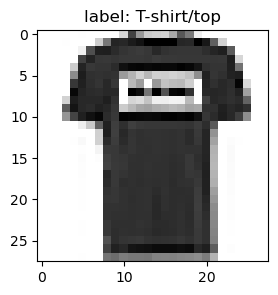

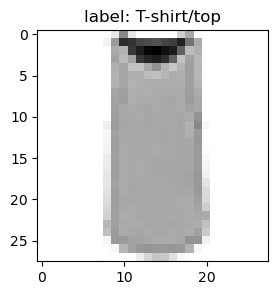

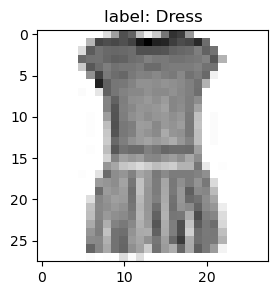

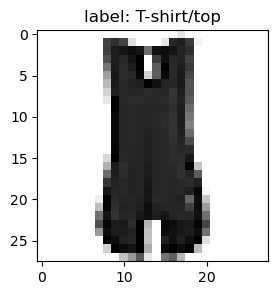

In [4]:
import matplotlib.pyplot as plt
# Verify the data looks as expected
for sample_index in range(1,5):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
    plt.title("label: " + class_names[y_train[sample_index]])

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

It looks reasonable. yes, the quality is a bit poor.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras import optimizers, initializers

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten())
model.add(Dense(10))

# Compile the model using `model.compile()`
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics='accuracy')

# Train the model with `model.fit()`
model.fit(X_train, onehot_y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model with `model.evaluate()`
model.evaluate(X_test, onehot_y_test)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 10.4511 - accuracy: 0.1058 - val_loss: 11.0511 - val_accuracy: 0.0986
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 10.8825 - accuracy: 0.1007 - val_loss: 11.7876 - val_accuracy: 0.0983
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 10.9674 - accuracy: 0.1004 - val_loss: 10.7709 - val_accuracy: 0.0983
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 9.6944 - accuracy: 0.1346 - val_loss: 9.5392 - val_accuracy: 0.1408
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 9.4499 - accuracy: 0.1425 - val_loss: 9.4842 - val_accuracy: 0.1402
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 9.3985 - accuracy: 0.1418 - val_loss: 9.4398 - val_accuracy: 0.1397
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 9.3770 - accuracy: 0.1413 - val_loss: 9.4156 - val_acc

[9.57575798034668, 0.13950000703334808]

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

Accuracy is only 14%. Epoch 6 is when it starts overfitting. It seems to be a non linear problem and therefore hard to predict using a linear regression model

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [12]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(X_train, onehot_y_train, epochs=6, batch_size=100, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, onehot_y_test)

Epoch 1/6
480/480 [==============================] - 14s 26ms/step - loss: 0.8352 - accuracy: 0.7205 - val_loss: 0.6523 - val_accuracy: 0.7678
Epoch 2/6
480/480 [==============================] - 12s 25ms/step - loss: 0.5787 - accuracy: 0.7961 - val_loss: 0.6485 - val_accuracy: 0.7646
Epoch 3/6
480/480 [==============================] - 12s 26ms/step - loss: 0.5313 - accuracy: 0.8148 - val_loss: 0.4962 - val_accuracy: 0.8231
Epoch 4/6
480/480 [==============================] - 11s 23ms/step - loss: 0.5107 - accuracy: 0.8217 - val_loss: 0.4986 - val_accuracy: 0.8235
Epoch 5/6
480/480 [==============================] - 12s 25ms/step - loss: 0.4880 - accuracy: 0.8315 - val_loss: 0.5015 - val_accuracy: 0.8242
Epoch 6/6
313/313 [==============================] - 8s 24ms/step - loss: 0.4851 - accuracy: 0.8275


[0.48514506220817566, 0.8274999856948853]

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

It gave a huge leap forwar to over 82% accuracy with less numbers of epochs and larger batch size. I expect it to get better with lower atch sie an higher number of epochs. I think the real difference came with it's ability to handle non linearity through an activation function

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [16]:
# A. Test Hyperparameters
hyparam_kernel_sizes =[(3,3), (5,5), (7,7)]
test_results_hyp_tuning=[]

for kernel_size in hyparam_kernel_sizes:
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, onehot_y_train, epochs=6, batch_size=100, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, onehot_y_test)
    
    test_results_hyp_tuning.append([kernel_size, test_loss, test_accuracy])

Epoch 1/6
480/480 [==============================] - 15s 29ms/step - loss: 0.8623 - accuracy: 0.7170 - val_loss: 0.7096 - val_accuracy: 0.7448
Epoch 2/6
480/480 [==============================] - 19s 39ms/step - loss: 0.5607 - accuracy: 0.8017 - val_loss: 0.5294 - val_accuracy: 0.8102
Epoch 3/6
480/480 [==============================] - 15s 30ms/step - loss: 0.5222 - accuracy: 0.8167 - val_loss: 0.5772 - val_accuracy: 0.8084
Epoch 4/6
480/480 [==============================] - 11s 24ms/step - loss: 0.4957 - accuracy: 0.8266 - val_loss: 0.4909 - val_accuracy: 0.8238
Epoch 5/6
480/480 [==============================] - 11s 24ms/step - loss: 0.4757 - accuracy: 0.8338 - val_loss: 0.4550 - val_accuracy: 0.8396
Epoch 6/6
313/313 [==============================] - 7s 22ms/step - loss: 0.4726 - accuracy: 0.8331
Epoch 1/6
480/480 [==============================] - 13s 25ms/step - loss: 0.8297 - accuracy: 0.7293 - val_loss: 0.5855 - val_accuracy: 0.7902
Epoch 2/6
480/480 [=======================

In [17]:
print(test_results_hyp_tuning)

[[(3, 3), 0.47256025671958923, 0.8331000208854675], [(5, 5), 0.4820902347564697, 0.8278999924659729], [(7, 7), 0.4870906174182892, 0.8248000144958496]]


In [24]:
# B. Test presence or absence of regularization
from tensorflow.keras import regularizers

test_results_regularization=[]

for i in range(0,2):
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    
    model = Sequential()
    
    if i==1:
            model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)))
    
    else:
            model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, onehot_y_train, epochs=6, batch_size=100, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, onehot_y_test)
    
    test_results_regularization.append([i, test_loss, test_accuracy])

Epoch 1/6
480/480 [==============================] - 13s 26ms/step - loss: 0.8520 - accuracy: 0.7221 - val_loss: 0.5952 - val_accuracy: 0.7933
Epoch 2/6
480/480 [==============================] - 12s 25ms/step - loss: 0.5645 - accuracy: 0.8018 - val_loss: 0.5288 - val_accuracy: 0.8138
Epoch 3/6
480/480 [==============================] - 13s 27ms/step - loss: 0.5268 - accuracy: 0.8149 - val_loss: 0.4976 - val_accuracy: 0.8267
Epoch 4/6
480/480 [==============================] - 12s 25ms/step - loss: 0.4992 - accuracy: 0.8257 - val_loss: 0.4726 - val_accuracy: 0.8343
Epoch 5/6
480/480 [==============================] - 12s 24ms/step - loss: 0.4851 - accuracy: 0.8302 - val_loss: 0.5003 - val_accuracy: 0.8245
Epoch 6/6
313/313 [==============================] - 8s 24ms/step - loss: 0.4945 - accuracy: 0.8250
Epoch 1/6
480/480 [==============================] - 13s 26ms/step - loss: 0.8570 - accuracy: 0.7278 - val_loss: 0.6829 - val_accuracy: 0.7570
Epoch 2/6
480/480 [=======================

In [25]:
print(test_results_regularization)

[[0, 0.4944717288017273, 0.824999988079071], [1, 0.5210400223731995, 0.824999988079071]]


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Kernel size (3,3) performed better and regularized vs unregularized regularized results were more or less the same. In fact, not much difference is seen in all the 6 combination as the accuracy is just a %age up or down. I would rather increase the number of epochs and lower the the batch size

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [26]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(X_train, onehot_y_train, epochs=10, batch_size=50, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, onehot_y_test)

Epoch 1/10
960/960 [==============================] - 17s 17ms/step - loss: 0.7292 - accuracy: 0.7507 - val_loss: 0.5418 - val_accuracy: 0.8059
Epoch 2/10
960/960 [==============================] - 15s 16ms/step - loss: 0.5316 - accuracy: 0.8126 - val_loss: 0.5195 - val_accuracy: 0.8180
Epoch 3/10
960/960 [==============================] - 15s 16ms/step - loss: 0.4952 - accuracy: 0.8276 - val_loss: 0.4741 - val_accuracy: 0.8322
Epoch 4/10
960/960 [==============================] - 16s 16ms/step - loss: 0.4719 - accuracy: 0.8354 - val_loss: 0.4639 - val_accuracy: 0.8391
Epoch 5/10
960/960 [==============================] - 15s 16ms/step - loss: 0.4545 - accuracy: 0.8432 - val_loss: 0.4491 - val_accuracy: 0.8447
Epoch 6/10
960/960 [==============================] - 15s 16ms/step - loss: 0.4387 - accuracy: 0.8491 - val_loss: 0.4306 - val_accuracy: 0.8483
Epoch 7/10
960/960 [==============================] - 16s 17ms/step - loss: 0.4249 - accuracy: 0.8527 - val_loss: 0.4643 - val_accuracy:

[0.4189172387123108, 0.8528000116348267]

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

Final model has an accuracy of 85%, considerably more than the linear model. The real value add was the non linear complexity added by the activation function. If i had more time, i would also try other optimizers and add more layers. The platueing of accuracy to me seems as a missing learning layer.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.